<a href="https://colab.research.google.com/github/Nuranisah05/Machine_Learning_2025/blob/main/Latihan10_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score


from imblearn.over_sampling import SMOTE

# **2. Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "/content/gdrive/MyDrive/PRAKTIKUM ML/Praktikum10"

In [ ]:
df = pd.read_csv(path + '/data/weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


# **3. Data Cleaning**

In [ ]:
# Memeriksa Nilai Unik pada Kolom Kategorikal
print(df['Cloud Cover'].unique())
print(df['Season'].unique())
print(df['Location'].unique())
print(df['Weather Type'].unique())

['partly cloudy' 'clear' 'overcast' 'cloudy']
['Winter' 'Spring' 'Summer' 'Autumn']
['inland' 'mountain' 'coastal']
['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [ ]:
# Mengubah Nilai Kategorikal menjadi Numerik
replacements = {
    'Cloud Cover': {'partly cloudy': 0, 'clear': 1, 'overcast': 2, 'cloudy': 3},
    'Season': {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3},
    'Location': {'inland': 0, 'mountain': 1, 'coastal': 2},
    'Weather Type': {'Rainy': 0, 'Cloudy': 1, 'Sunny': 2, 'Snowy': 3}
}

df = df.replace(replacements, inplace=False)
df.head()

/tmp/ipython-input-4015243865.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(replacements, inplace=False)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,0,1010.82,2,0,3.5,0,0
1,39.0,96,8.5,71.0,0,1011.43,7,1,10.0,0,1
2,30.0,64,7.0,16.0,1,1018.72,5,1,5.5,1,2
3,38.0,83,1.5,82.0,1,1026.25,7,1,1.0,2,2
4,27.0,74,17.0,66.0,2,990.67,1,0,2.5,1,0


In [ ]:
# Cek Missing Value
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


# **4. Analisis Korelasi**

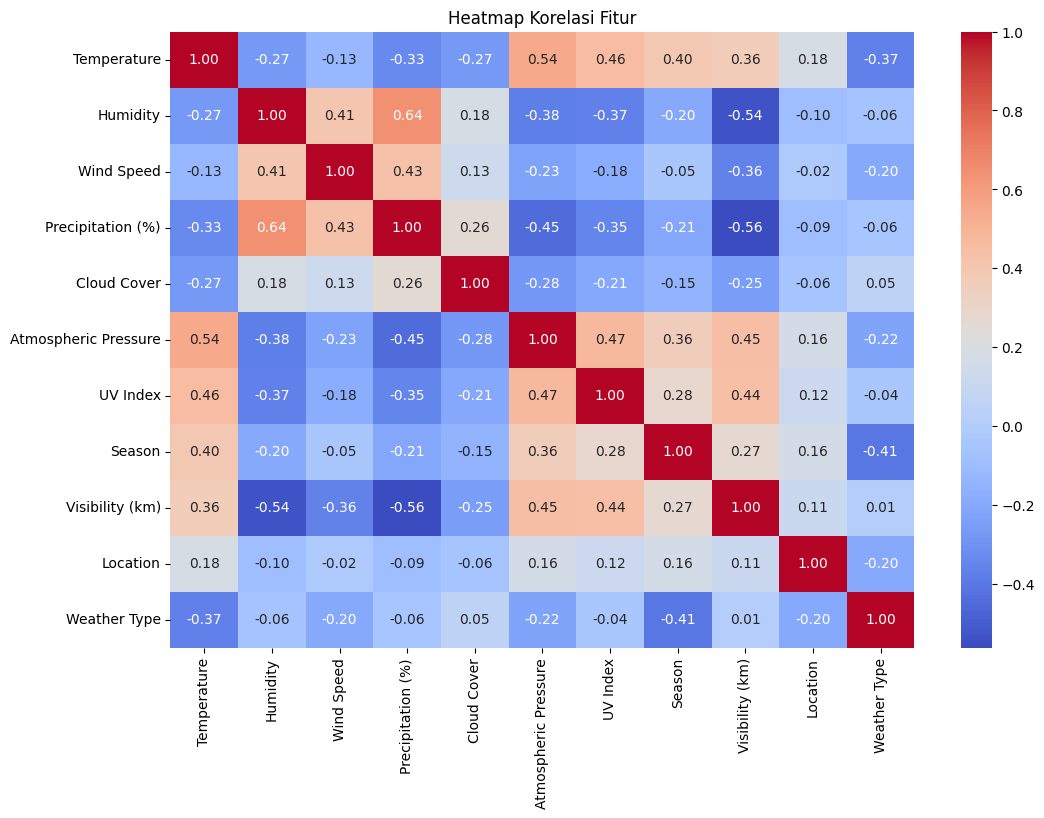

In [ ]:
# Menghitung matriks korelasi menggunakan Spearman
correlation_matrix = df.corr(method='spearman')

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap Korelasi Fitur')
plt.show()

# **5. Visualisasi Distribusi Weather Type**

/tmp/ipython-input-3062988461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather Type', data=df, palette='Set2')


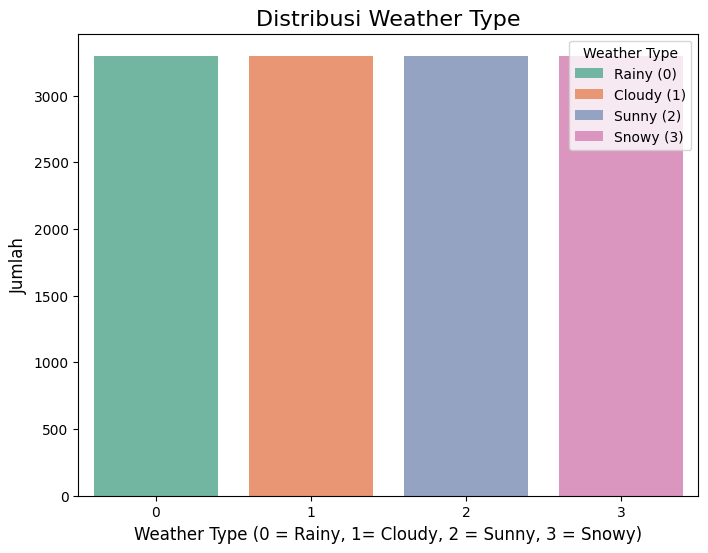

In [ ]:
# Membuat diagram batang untuk Weather Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Weather Type', data=df, palette='Set2')

# Menambahkan judul dan label
plt.title('Distribusi Weather Type', fontsize=16)
plt.xlabel('Weather Type (0 = Rainy, 1= Cloudy, 2 = Sunny, 3 = Snowy)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menambahkan legend (adjusted labels for correctness)
plt.legend(title='Weather Type', labels=['Rainy (0)', 'Cloudy (1)', 'Sunny (2)', 'Snowy (3)'], loc='upper right')

# Menampilkan diagram
plt.show()

# **6. Pemisahan Data dan Normalisasi**

In [ ]:
# data yang dilatih
x_train = df.drop(columns=['Weather Type'])
y_train = df['Weather Type']

# data validasinya
x_test = df.drop(columns=['Weather Type'])
y_test = df['Weather Type']

# Normalisasi features after splitting
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **7. Menangani Ketidakseimbangan Kelas dengan SMOTE**

In [ ]:
print("Bifore SMOTE:")
print(y_train.value_counts())

sm = SMOTE(random_state=42, k_neighbors=1) # Set k_neighbors to 1
x_train_smote, y_train_smote = sm.fit_resample(x_train_scaled, y_train)

print("After SMOTE:")
print(y_train_smote.value_counts())

Bifore SMOTE:
Weather Type
0    3300
1    3300
2    3300
3    3300
Name: count, dtype: int64
After SMOTE:
Weather Type
0    3300
1    3300
2    3300
3    3300
Name: count, dtype: int64


# **8. Menentukan Parameter Terbaik (Hyperparameter Tuning)**

In [ ]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(x_train_smote, y_train_smote)

print("Best Parameters:", grid.best_params_)
print("Best Score (CV):", grid.best_score_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best Score (CV): 0.8971212121212121


# **9. Melatih Model KNN Terbaik dan Melakukan Prediksi**

In [ ]:
best_kkn = grid.best_estimator_
best_kkn.fit(x_train_smote, y_train_smote)

# Prediksi
y_pred = best_kkn.predict(x_test_scaled)

# **10. Evaluasi Model dengan Classification Report**

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3300
           1       1.00      1.00      1.00      3300
           2       1.00      1.00      1.00      3300
           3       1.00      1.00      1.00      3300

    accuracy                           1.00     13200
   macro avg       1.00      1.00      1.00     13200
weighted avg       1.00      1.00      1.00     13200



# **11. Evaluasi dengan Confusion Matrix**

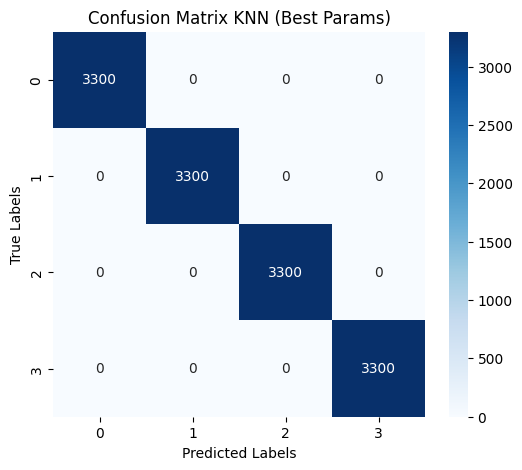

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix KNN (Best Params)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **12. Validasi Model dengan Cross Validation**

In [ ]:
cv_scores = cross_val_score(best_kkn, x_train_smote, y_train_smote, cv=5)
print("Cross-Validation Scores:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

Cross-Validation Scores: 0.8971212121212121
Std Dev: 0.007300294973725195


# **13. Menentukan Nilai K Optimal dengan Elbow Method**

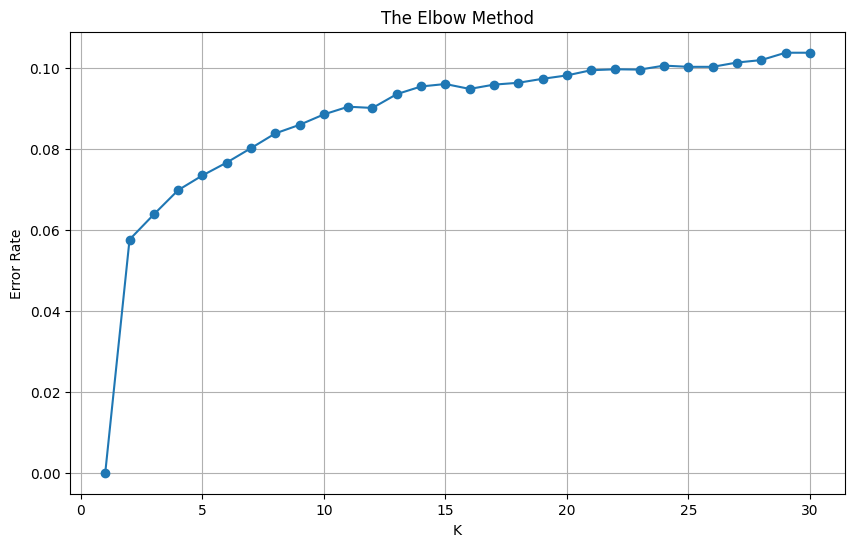

In [ ]:
errors = []

for k in range(1, 31):
  kkn_temp = KNeighborsClassifier(n_neighbors=k)
  kkn_temp.fit(x_train_smote, y_train_smote)
  pred = kkn_temp.predict(x_test_scaled)
  errors.append(np.mean(pred != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), errors, marker='o')
plt.title("The Elbow Method")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid(True)
plt.show()